In [1]:
# importing pandas for reading data and performing other dataframe related operations
import pandas as pd
# importing numpy for performing various numerical operations
import numpy as np
# importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint 
import warnings
warnings.filterwarnings('ignore')


## 01. Importing datasets

In [2]:
# importing the historical data as a pandas DataFrame
historical_df = pd.read_csv("Credit_score.csv",low_memory=False)


- creating a copy of the data for further analysis

In [3]:
df = historical_df.copy()

## 02. Exploratory Data Analysis

- We start this by viewing the first few rows of the dataset.

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


 - We then find the number of rows and columns there in the data.

In [5]:
print("The number of rows are {} and the number of columns are {}".format(df.shape[0],df.shape[1]))

The number of rows are 100000 and the number of columns are 27


In [6]:
# finding the data types and number of non-null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
# finding the key statistical values of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.63333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.00000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.00000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.00000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.00000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.00000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.00000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.00000


In [8]:
# finding the key statistical values of the categorical columns
df.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [9]:
df.Month.value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

### Some of the key insights based on the exploratory analysis done so far are as follows-

- Customer_ID has 12500 unique values, indicating that there is information for 12500 customers.
- Only eight unique values are present for the month. It seems information for all the 125000 customers is retrieved every month and is done from January to August.
- Age has 1788 unique values; therefore, it looks anomalous.
- The number of SSN and Customer ID values don’t match, which means there are problems in the column.
- Data types seem incorrect due to invalid values being present in the data. E.g., Credit_History_Age or Amount_invested_monthly has data type as “object” due to non-numerical values in the columns.

* As expected, the data is unclean and full of issues. We first focus on removing the missing values and correcting the data type. To do so, we need to find all the unwanted values in the different columns that cause them to have incorrect data types.



In [10]:
# finding the unique values for each column in the data to find unwanted values
# first creating a copy of the data that do not have missing value

In [11]:
df_without_na = df.dropna().copy()

In [12]:
# finding the unique values for each column

In [13]:
for i in df_without_na:
    print('\n', i, df_without_na[i].unique()[:10])


 ID ['0x1602' '0x1608' '0x160e' '0x160f' '0x1610' '0x1612' '0x1613' '0x1615'
 '0x161a' '0x161e']

 Customer_ID ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' 'CUS_0xb891' 'CUS_0x284a'
 'CUS_0x5407' 'CUS_0x4157' 'CUS_0xba08' 'CUS_0xa66b' 'CUS_0xc0ab']

 Month ['January' 'July' 'February' 'March' 'May' 'June' 'August' 'April']

 Name ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' 'Jasond' 'Nadiaq' 'Annk'
 'Charlie Zhur' 'Jamesj' 'Saphirj' 'Soyoungd']

 Age ['23' '28_' '28' '34' '54' '55' '33' '30' '24' '24_']

 SSN ['821-00-0265' '004-07-5839' '486-85-3974' '072-31-6145' '#F%$D@*&8'
 '411-51-0676' '500-92-6408' '070-19-1622' '366-68-1681' '221-30-8554']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager']

 Annual_Income ['19114.12' '34847.84' '34847.84_' '143162.64' '30689.89' '30689.89_'
 '131313.4' '34081.38' '114838.41' '31370.8']

 Monthly_Inhand_Salary [ 1824.843333  3037.986667 12187.22      2612.490833 11242.7833

In [14]:
df["SSN"].unique()

array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [15]:
df.isna().sum()/len(df)

ID                          0.00000
Customer_ID                 0.00000
Month                       0.00000
Name                        0.09985
Age                         0.00000
SSN                         0.00000
Occupation                  0.00000
Annual_Income               0.00000
Monthly_Inhand_Salary       0.15002
Num_Bank_Accounts           0.00000
Num_Credit_Card             0.00000
Interest_Rate               0.00000
Num_of_Loan                 0.00000
Type_of_Loan                0.11408
Delay_from_due_date         0.00000
Num_of_Delayed_Payment      0.07002
Changed_Credit_Limit        0.00000
Num_Credit_Inquiries        0.01965
Credit_Mix                  0.00000
Outstanding_Debt            0.00000
Credit_Utilization_Ratio    0.00000
Credit_History_Age          0.09030
Payment_of_Min_Amount       0.00000
Total_EMI_per_month         0.00000
Amount_invested_monthly     0.04479
Payment_Behaviour           0.00000
Monthly_Balance             0.01200
dtype: float64

## 03. Data Preprocessing

#### 03.1. Missing value imputation and typecasting

## Correcting Data Types:
- observed few columns with incorrect data types, especially the columns that should be numerical but are marked as object. These columns include:
    - Age
    - Annual_Income
    - Num_of_Loan
    - Num_of_Delayed_Payment
    - Changed_Credit_Limit
    - Outstanding_Debt
    - Credit_History_Age
    - Amount_invested_monthly


In [16]:
df["Age"].value_counts()

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64

In [17]:
df["Annual_Income"].value_counts()

Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933       1
Name: count, Length: 18940, dtype: int64

In [18]:
df["Num_of_Loan"].value_counts()

Num_of_Loan
3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: count, Length: 434, dtype: int64

In [19]:
df["Num_of_Delayed_Payment"].value_counts()

Num_of_Delayed_Payment
19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: count, Length: 749, dtype: int64

In [20]:
df["Changed_Credit_Limit"].value_counts()

Changed_Credit_Limit
_        2091
8.22      135
11.5      127
11.32     126
7.35      121
         ... 
-5.78       1
30.1        1
35.89       1
-3.67       1
21.17       1
Name: count, Length: 3635, dtype: int64

In [21]:
df["Outstanding_Debt"].value_counts()

Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: count, Length: 13178, dtype: int64

In [22]:
df["Credit_History_Age"].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [23]:
df["Amount_invested_monthly"].value_counts()

Amount_invested_monthly
__10000__      4305
0               169
80.41529544       1
36.66235139       1
89.73848936       1
               ... 
36.54190859       1
93.45116319       1
140.8097222       1
38.7393767        1
167.1638652       1
Name: count, Length: 91049, dtype: int64

**Observations:**
- Several columns contain erroneous values with non-numeric characters (e.g., underscores or special symbols). This affects `Age`, `Annual_Income`, `Num_of_Loan`, `Num_of_Delayed_Payment`, `Changed_Credit_Limit`, `Outstanding_Debt`, and `Amount_invested_monthly`.
- These values need to be cleaned by removing non-numeric characters and converting the columns to appropriate numeric data types.

**Cleaning Steps:**
* I have created a user-defined function that removes unwanted values and performs grouped Missing Value Imputation (MVI).

The `preprocess_data` function is designed to perform multiple data cleaning tasks on a specified column:
1. **Strip unwanted values:** Removes specified characters from the beginning or end of string values in the column.
2. **Replace unwanted values:** Replaces specified unwanted values in the column with `NaN` (missing values).
3. **Group-based missing value imputation:** Fills missing values in the column by grouping the data and using the mode (most frequent value) within each group.
4. **Custom missing value imputation:** Allows the user to fill missing values with a custom value provided.
5. **Change datatype:** Converts the column's data type to a user-specified type.

Each task is executed based on the parameters passed, providing flexibility for cleaning the data.



In [24]:
def preprocess_data(data, mvi_groupby=None, mvi_customval=None, column=None, unwanted_value_replace=None, unwanted_value_strip=None, datatype=None):

    # stripping unwanted values that might be at the beginning or end of the value
    if unwanted_value_strip is not None:
        if data[column].dtype == object:
            data[column] = data[column].str.strip(unwanted_value_strip)
        print(f"\nTrailing & leading {unwanted_value_strip} are removed")

    # replacing unwanted value with NaN
    if unwanted_value_replace is not None:
        data[column] = data[column].replace(unwanted_value_replace, np.nan)
        print(f"\nUnwanted value {unwanted_value_replace} is replaced with NaN")

    # performing missing value imputation (mvi) using mode after grouping data using the column specified by the user
    if mvi_groupby and column:
        data[column] = data[column].replace('', np.nan)
        group_mode = data.groupby(mvi_groupby)[column].transform(lambda x: x.mode().iat[0])
        data[column] = data[column].fillna(group_mode)
        print("\nMissing values imputed with group mode")

    # performing missing value imputation using a user provided custom value
    if mvi_customval is not None:
        data[column] = data[column].replace('', np.nan)
        data[column] = data[column].replace([np.NaN], mvi_customval)
        print(f"\nMissing values are replaced with '{mvi_customval}'")

    # changing the data type of the column based on user provided data type
    if datatype is not None:
        data[column] = data[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    print('----------------------------------------------------')

We start by performing MVI on the categorical columns.

In [25]:
df.select_dtypes("object").columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [26]:
missing_value_colums = df.columns[df.isnull().any()].to_list()
missing_value_colums

['Name',
 'Monthly_Inhand_Salary',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [27]:
print("Column: Name")
preprocess_data(data = df,
column = 'Name',
mvi_groupby = 'Customer_ID')

print("Column: Type_of_Loan")
preprocess_data(data = df,
column = 'Type_of_Loan',
mvi_customval = 'Not Specified')

Column: Name

Missing values imputed with group mode
----------------------------------------------------
Column: Type_of_Loan

Missing values are replaced with 'Not Specified'
----------------------------------------------------


Let us also replace unwanted values and perform MVI.

In [28]:
print("Column: SSN")
preprocess_data(data = df,
column = 'SSN',
unwanted_value_replace = '#F%$D@*&8',
mvi_groupby = 'Customer_ID')
print("Column: Occupation")
preprocess_data(data = df,
column = 'Occupation',
unwanted_value_replace = '_______',
mvi_groupby = 'Customer_ID',)

print("Column: Credit_Mix")
preprocess_data(data = df,
column = 'Credit_Mix',
unwanted_value_replace = '_',
mvi_groupby = 'Customer_ID')

print("Column: Payment_Behaviour")
preprocess_data(data = df,
column = 'Payment_Behaviour',
unwanted_value_replace = '!@9#%8',
mvi_groupby = 'Customer_ID')

Column: SSN

Unwanted value #F%$D@*&8 is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Occupation

Unwanted value _______ is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Credit_Mix

Unwanted value _ is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Payment_Behaviour

Unwanted value !@9#%8 is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------


We will now perform MVI on numerical columns.

In [29]:
print("Column: Monthly_Inhand_Salary")
preprocess_data(data = df,
column = 'Monthly_Inhand_Salary',
mvi_groupby = 'Customer_ID')

print("Column: Num_Credit_Inquiries")
preprocess_data(data = df,
column = 'Num_Credit_Inquiries',
mvi_groupby = 'Customer_ID')

Column: Monthly_Inhand_Salary

Missing values imputed with group mode
----------------------------------------------------
Column: Num_Credit_Inquiries

Missing values imputed with group mode
----------------------------------------------------


We will now strip the unwanted values and perform MVI and type casting.

In [30]:
print("Column: Age")
preprocess_data(data = df,
column = 'Age',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'int')

print("Column: Annual_Income")
preprocess_data(data = df,
column = 'Annual_Income',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

print("Column: Outstanding_Debt")
preprocess_data(data = df,
column = 'Outstanding_Debt',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

print("Column: Amount_invested_monthly")
preprocess_data(data = df,
column = 'Amount_invested_monthly',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

print("Column: Num_of_Loan")
preprocess_data(data = df,
column = 'Num_of_Loan',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'int')

print("Column: Num_of_Delayed_Payment")
preprocess_data(data = df,
column = 'Num_of_Delayed_Payment',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

Column: Age

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Age is changed to int
----------------------------------------------------
Column: Annual_Income

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Annual_Income is changed to float
----------------------------------------------------
Column: Outstanding_Debt

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Outstanding_Debt is changed to float
----------------------------------------------------
Column: Amount_invested_monthly

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Amount_invested_monthly is changed to float
----------------------------------------------------
Column: Num_of_Loan

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Num_of_Loan is changed to int
----------------------------------------------------
Column: Num_of_Delayed

Next, we not only strip unwanted values attached to the actual values (e.g., “_7272”) but also replace the unwanted values (e.g., “__-333333333333333333333333333-”) with NaN and perform MVI and type casting.

In [31]:
print("Column: Changed_Credit_Limit")
preprocess_data(data = df,
column = 'Changed_Credit_Limit',
unwanted_value_strip = '_',
unwanted_value_replace = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')
print("Column: Monthly_Balance")
preprocess_data(data = df,
column = 'Monthly_Balance',
unwanted_value_strip = '_',
unwanted_value_replace = '__-333333333333333333333333333__',
mvi_groupby = 'Customer_ID',
datatype = 'float')

Column: Changed_Credit_Limit

Trailing & leading _ are removed

Unwanted value _ is replaced with NaN

Missing values imputed with group mode

Datatype of Changed_Credit_Limit is changed to float
----------------------------------------------------
Column: Monthly_Balance

Trailing & leading _ are removed

Unwanted value __-333333333333333333333333333__ is replaced with NaN

Missing values imputed with group mode

Datatype of Monthly_Balance is changed to float
----------------------------------------------------


**Credit_History_Age:**
- Convert the values from "X Years and Y Months" into a numeric value (total months or years), which will allow for better comparisons and modeling.
- Cleaning the Age and Credit_History_Age Columns:

In [32]:
def credit_history_in_months(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val

In [33]:
# applying the function to the column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: credit_history_in_months(x)).astype(float)

In [34]:
print('Column: Credit_History_Age')
preprocess_data(data = df,
column = 'Credit_History_Age',
mvi_groupby = 'Customer_ID')

Column: Credit_History_Age

Missing values imputed with group mode
----------------------------------------------------


In [35]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [36]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int32
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object

### 03.2. Outlier capping

The next step in data preprocessing is to find and cap outliers. I have create a function that finds and caps outliers using the Inter-Quartile (IQR) method. 

In [37]:
import numpy as np
import pandas as pd

def outlier_capping(data, threshold=1.5):
    """
    Capping outliers in the DataFrame based on the Interquartile Range (IQR).
    
    Parameters:
    - data: DataFrame containing the data.
    - threshold: IQR multiplier to determine the bounds for outliers.
    
    Returns:
    - data_copy: DataFrame with outliers capped.
    - outlier_indices: List of indices of the capped outliers.
    """

    # Making a copy of the input DataFrame
    data_copy = data.copy()

    # Creating an empty list to save the outlier indices
    outlier_indices = []

    # Calculating quartiles and capping outliers for every numerical column in the data
    for column in data_copy.columns:
        if pd.api.types.is_numeric_dtype(data_copy[column]):
            # Calculating quartiles
            Q1 = data_copy[column].quantile(0.25)
            Q3 = data_copy[column].quantile(0.75)

            # Calculating inter-quartile range
            IQR = Q3 - Q1

            # Defining the upper and lower outlier bounds
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            # Identifying outliers
            outliers = data_copy[(data_copy[column] < lower_bound) | (data_copy[column] > upper_bound)]
            outlier_indices.extend(outliers.index)

            # Capping outliers
            data_copy[column] = np.where(data_copy[column] < lower_bound, lower_bound, data_copy[column])
            data_copy[column] = np.where(data_copy[column] > upper_bound, upper_bound, data_copy[column])

    # Removing duplicates from outlier_indices list
    outlier_indices = list(set(outlier_indices))

    # Returning the DataFrame with capped outliers and the list of outlier indices
    return data_copy, outlier_indices


In [38]:
# running the function to cap all the outliers in the data
df_clean, outliers = outlier_capping(df)

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [40]:
# comparing the columns with and without the outliers
def outlier_capping_comparison(data, data_processed, outlier_indices):
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            plt.figure(figsize=(12, 6))

            # plotting the numerical columns from the original dataframe
            plt.subplot(1, 2, 1)
            sns.boxplot(data=data[column])
            plt.title(f'Before Outlier Capping : {column}')

            # plot distribution of the numerical columns where outliers are capped
            plt.subplot(1, 2, 2)
            sns.boxplot(data=data_processed[column])
            plt.title(f'After Outlier Capping : {column}')

            # showing output
            plt.tight_layout()
            plt.show()

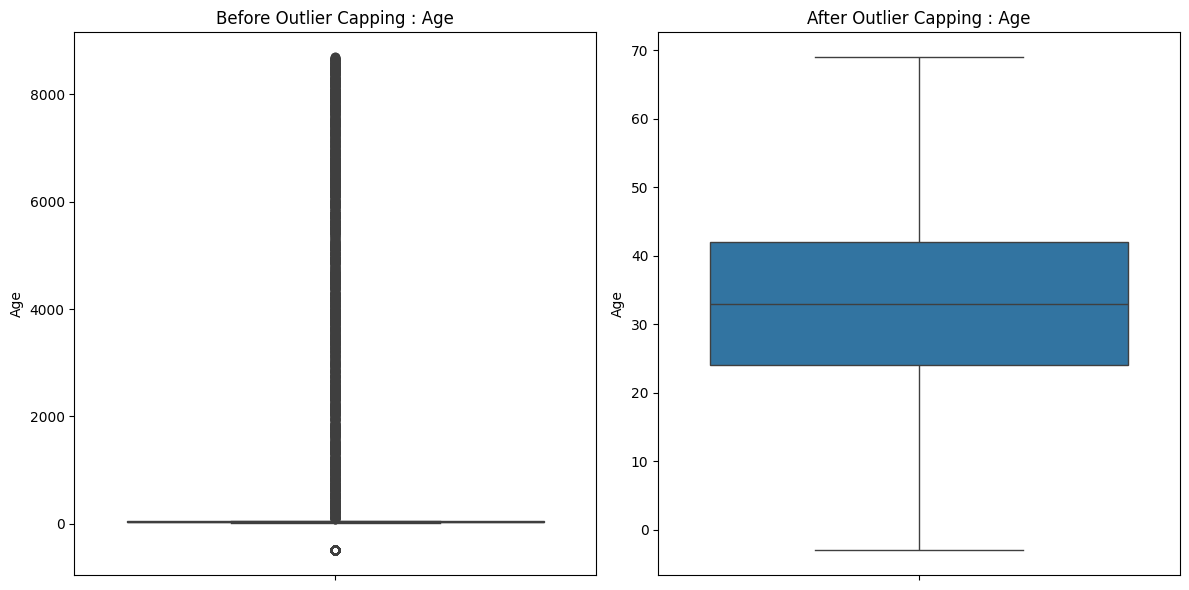

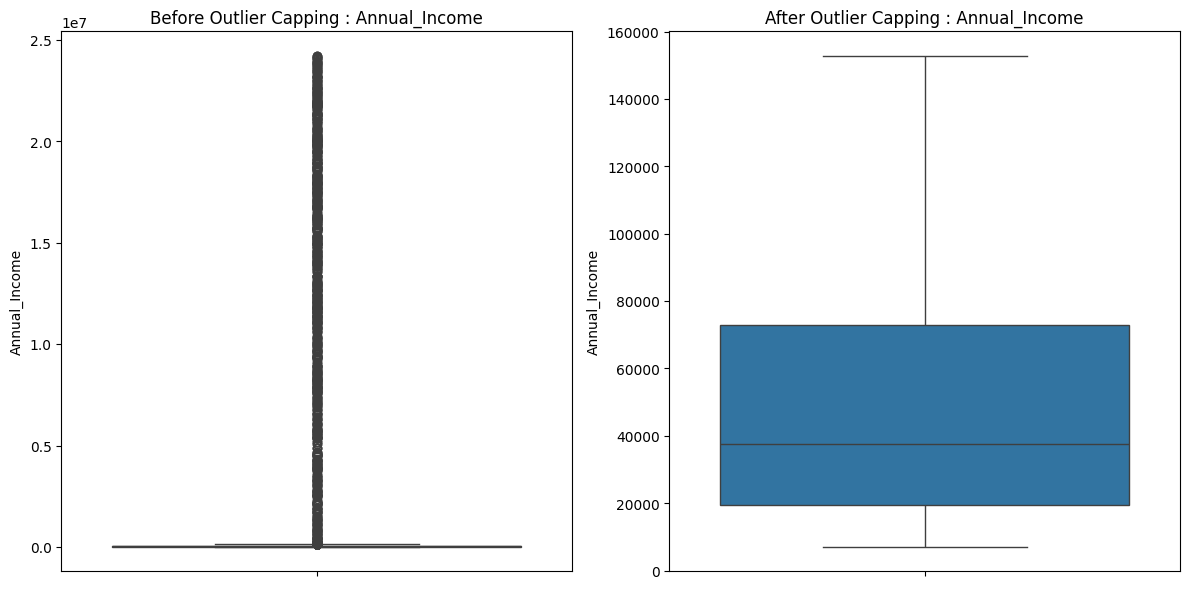

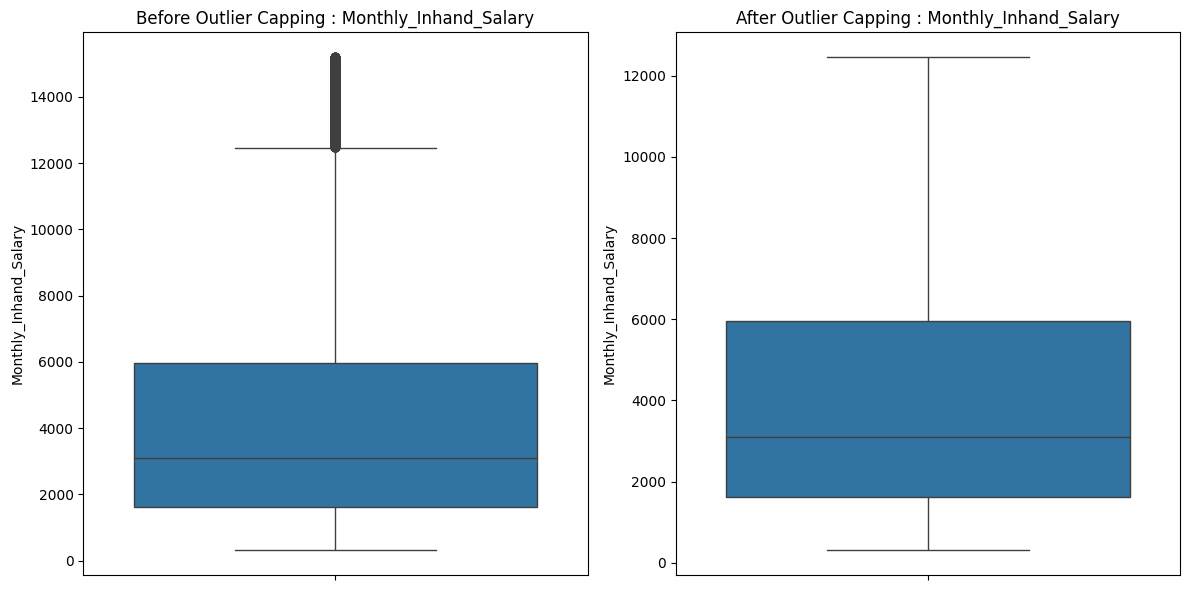

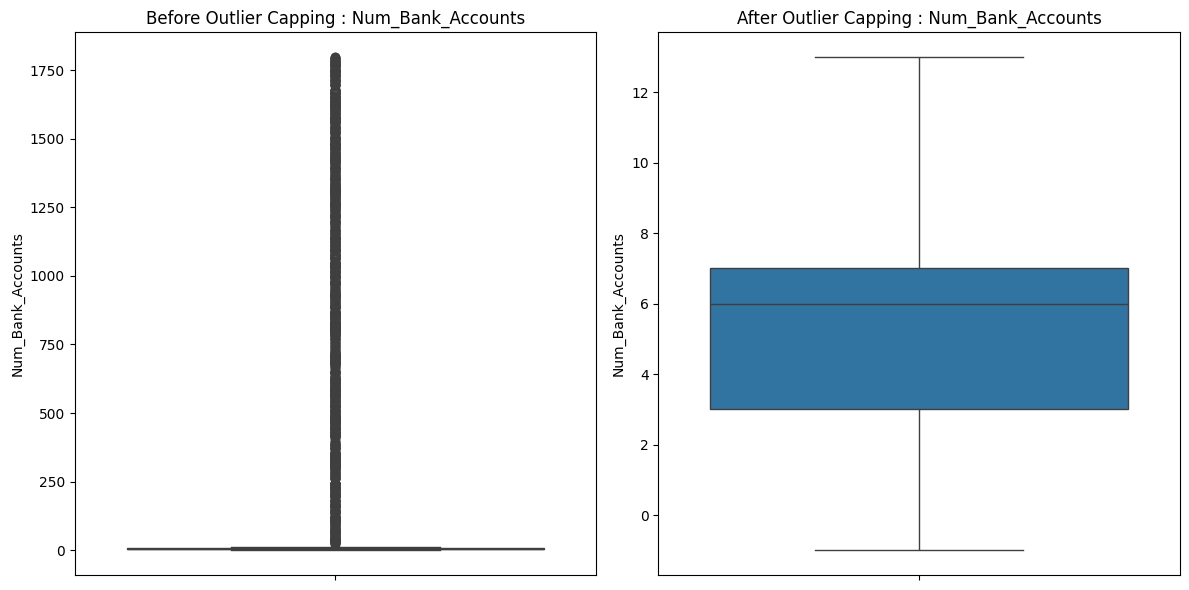

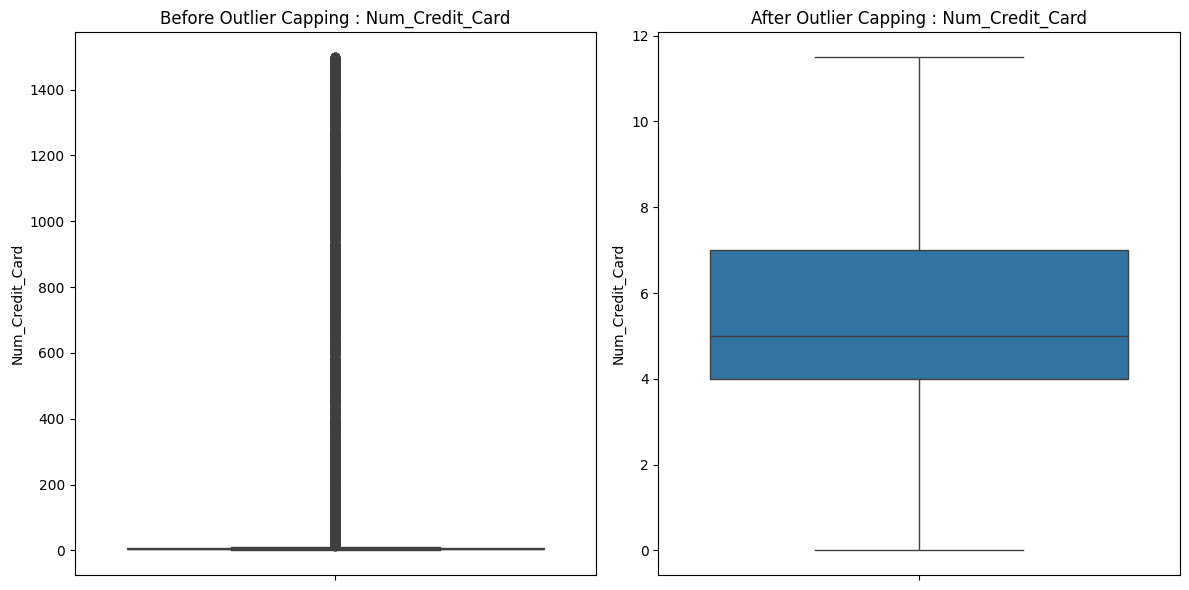

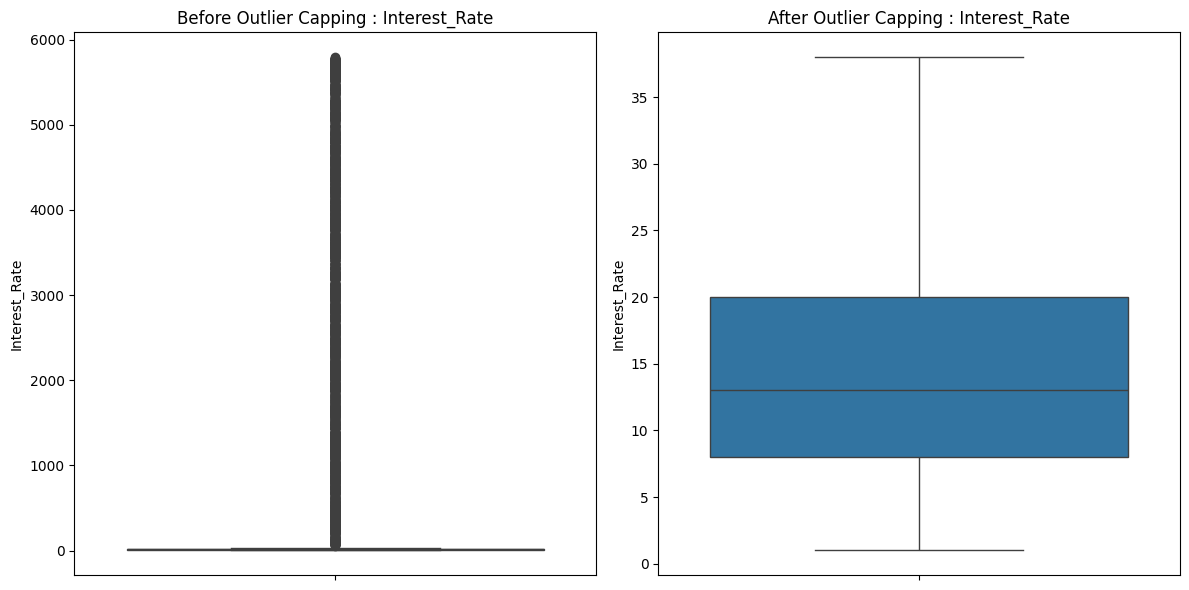

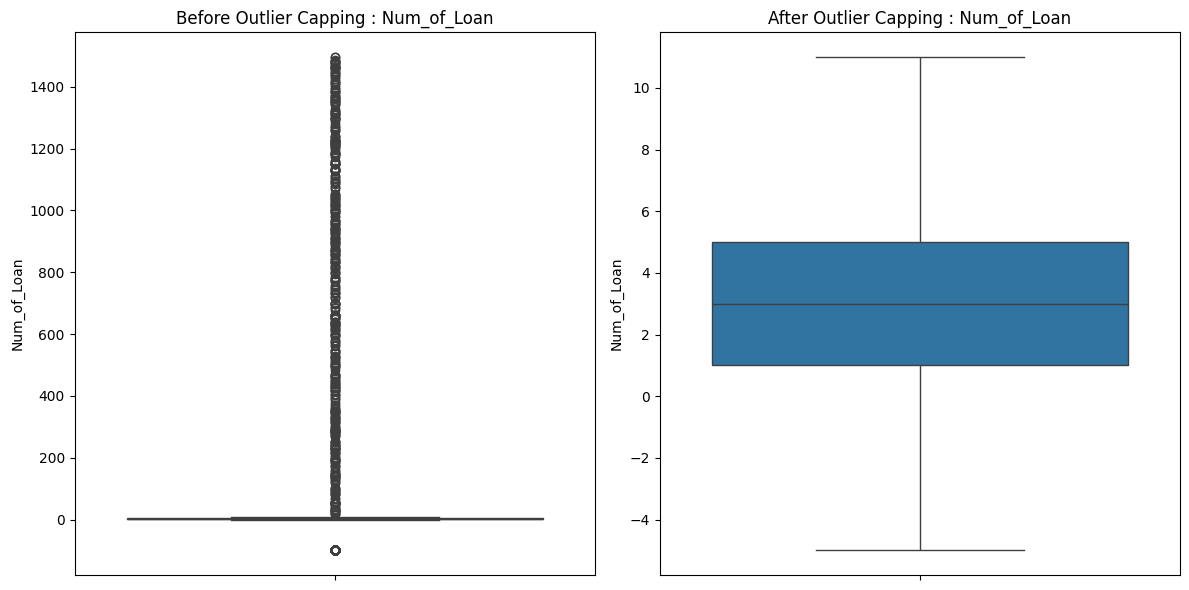

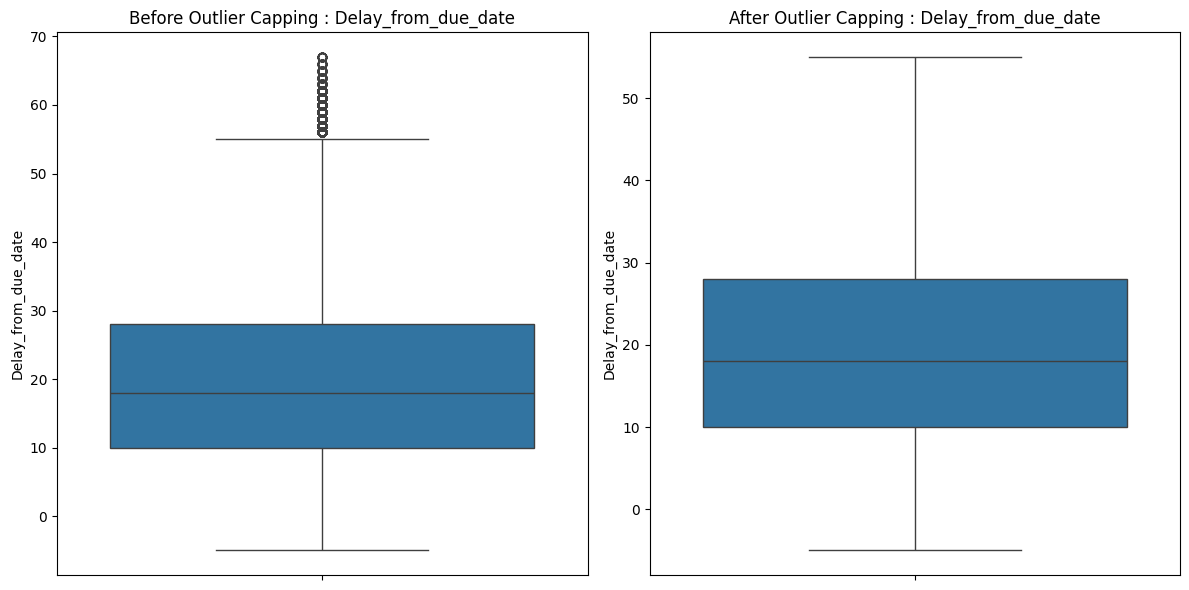

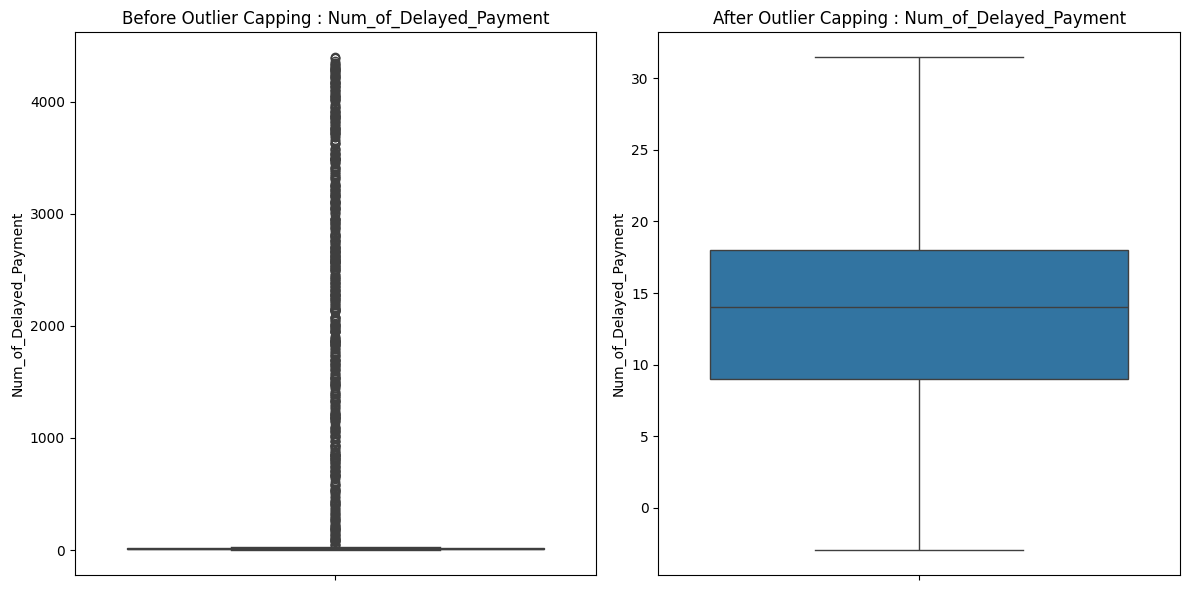

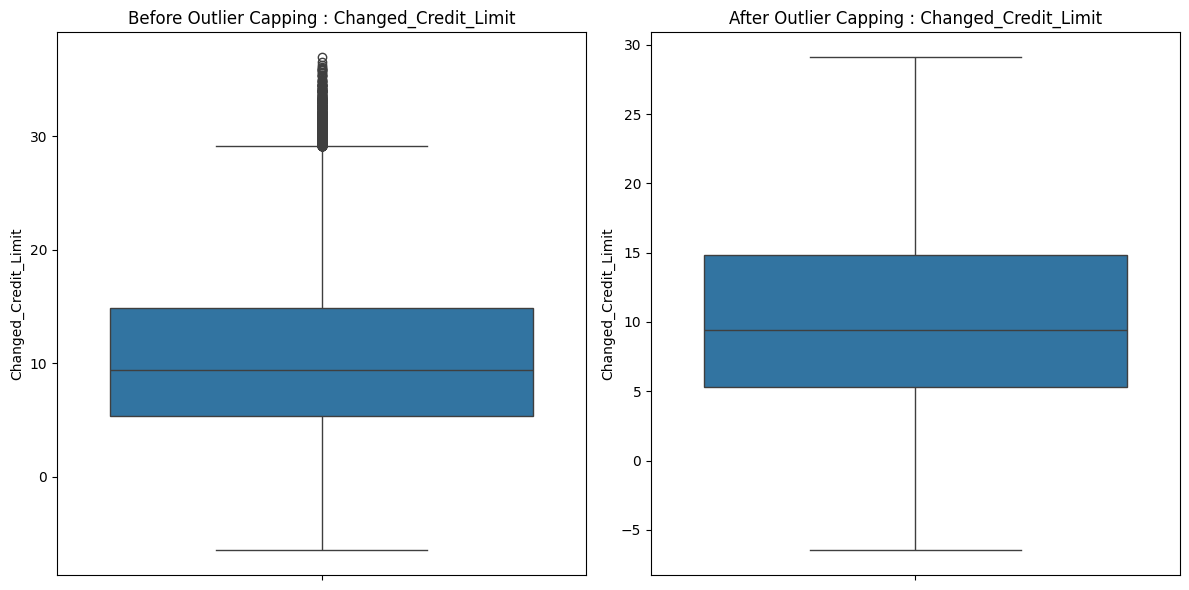

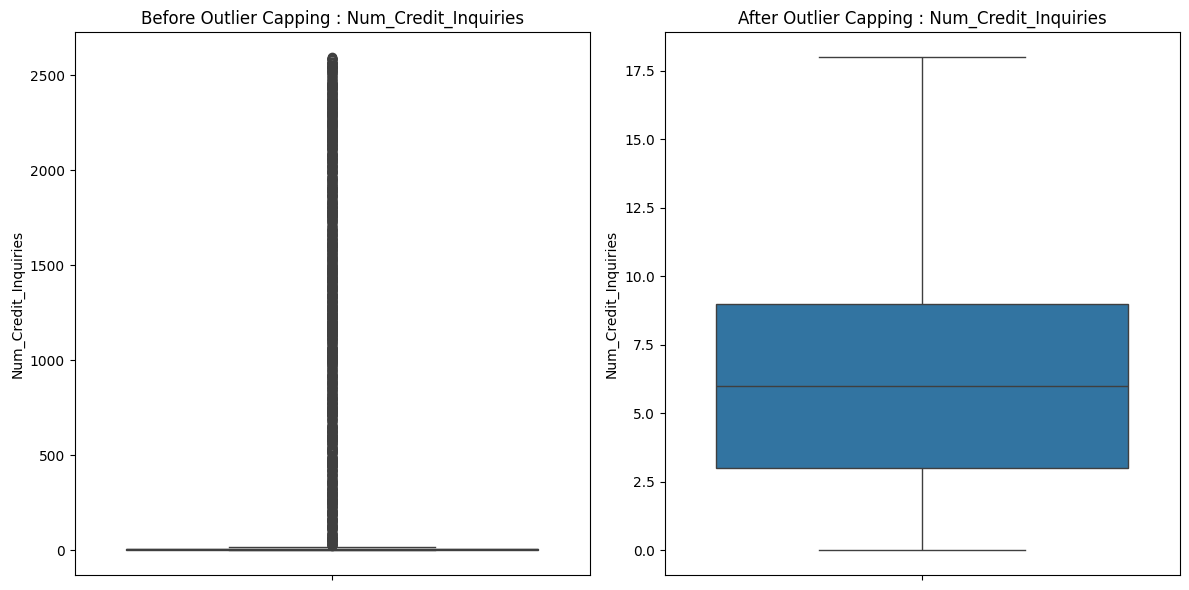

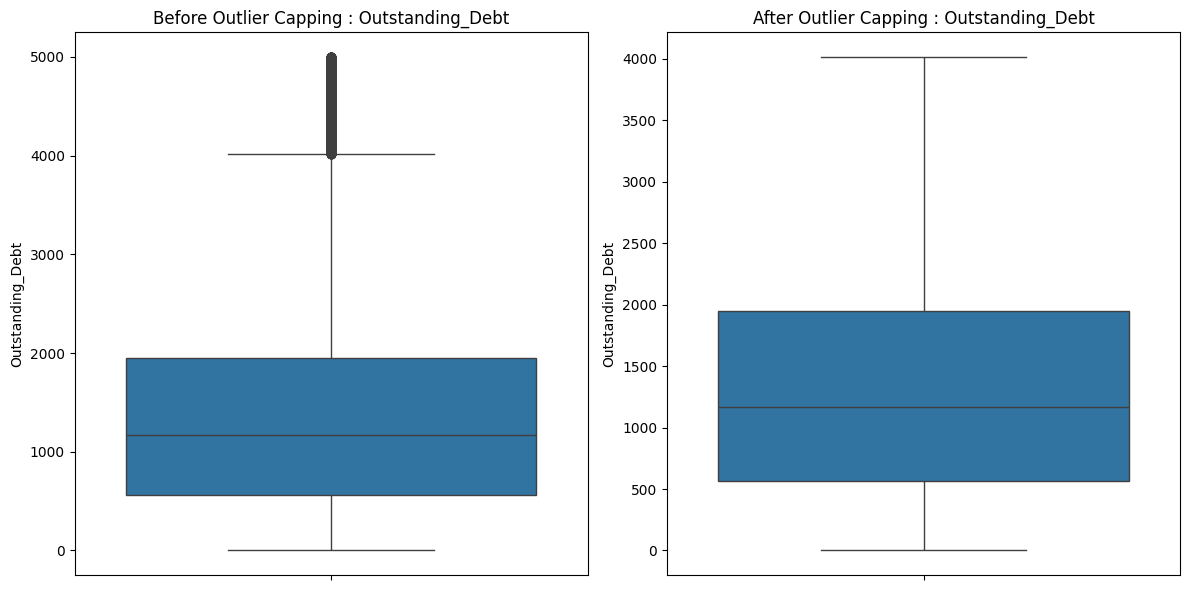

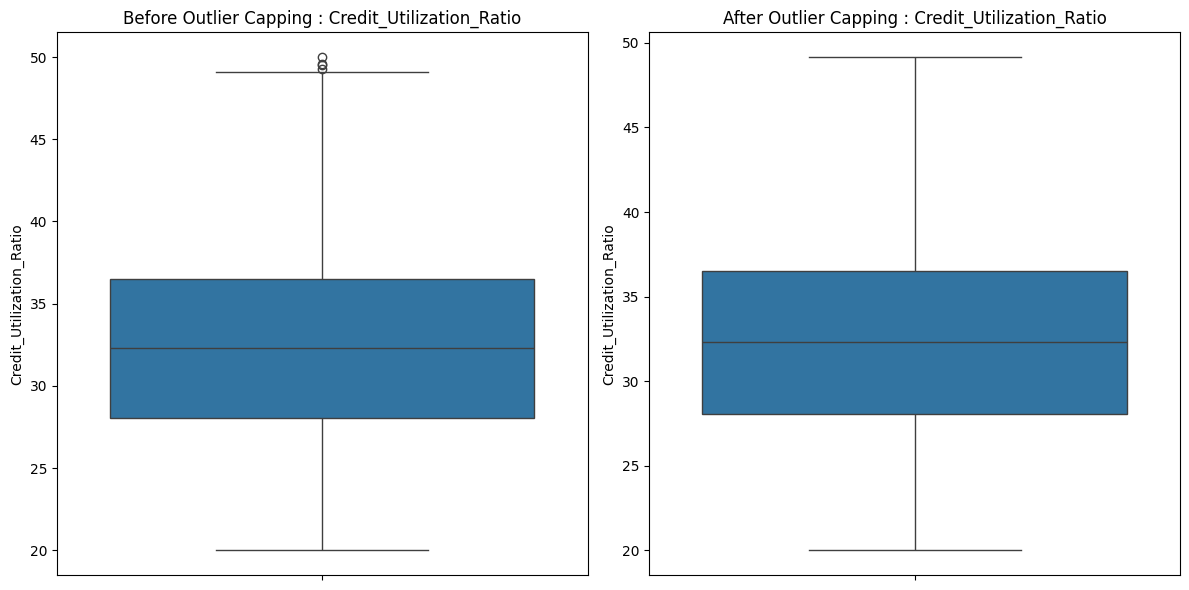

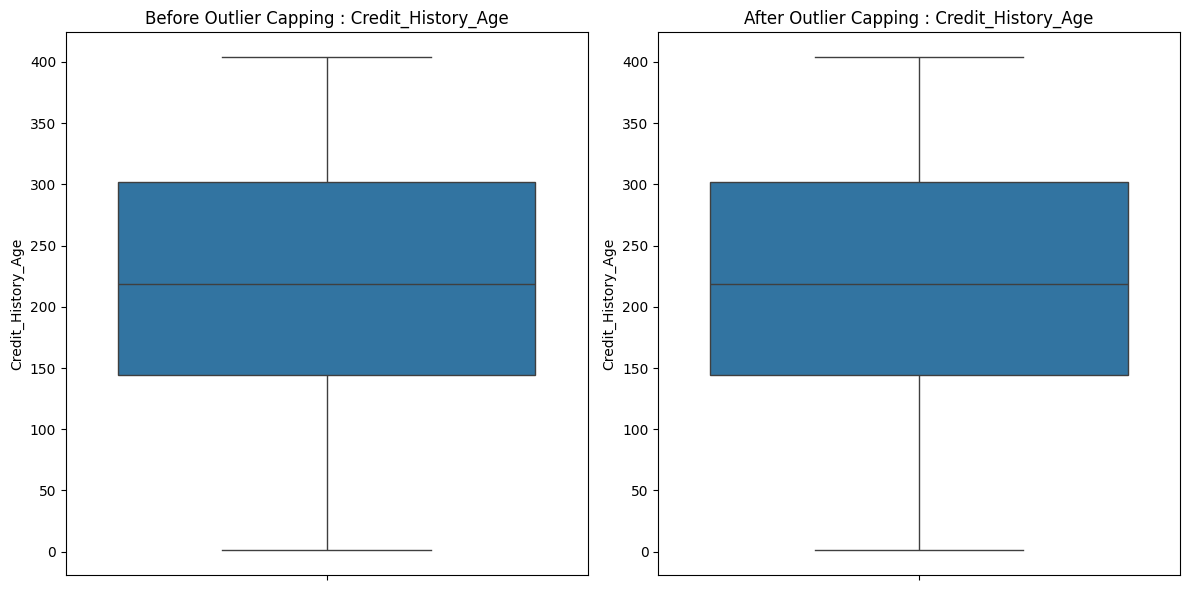

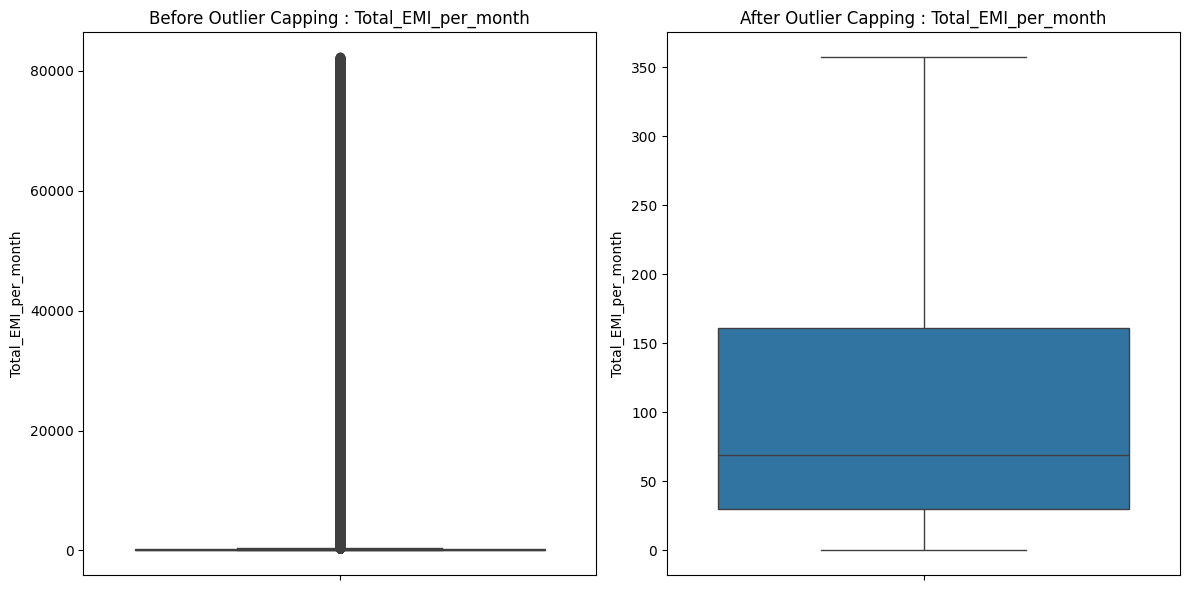

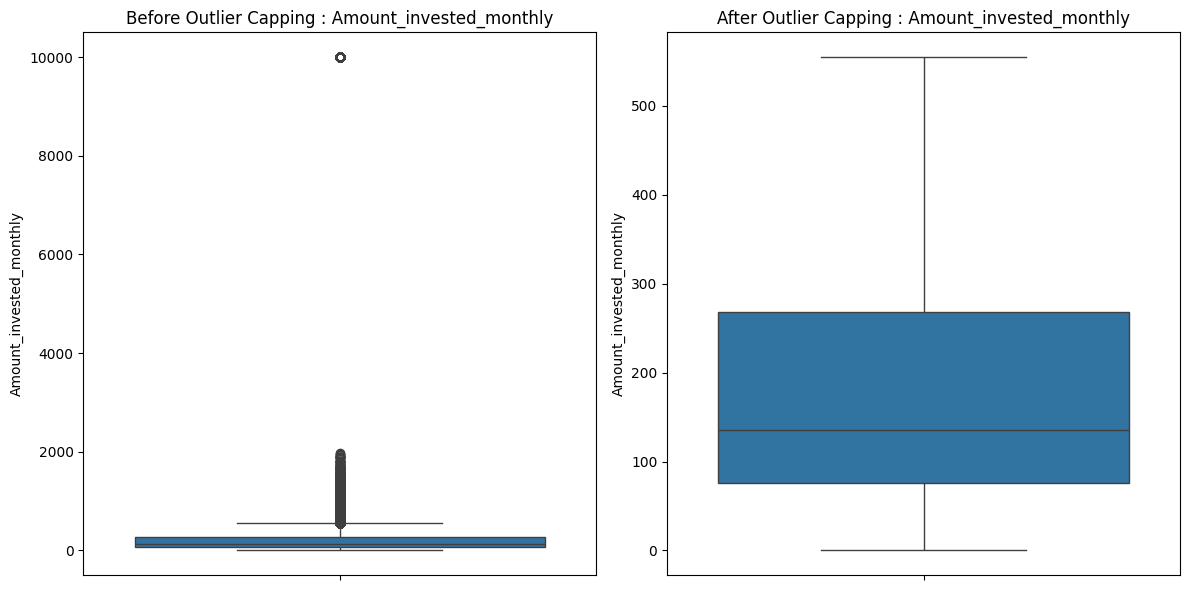

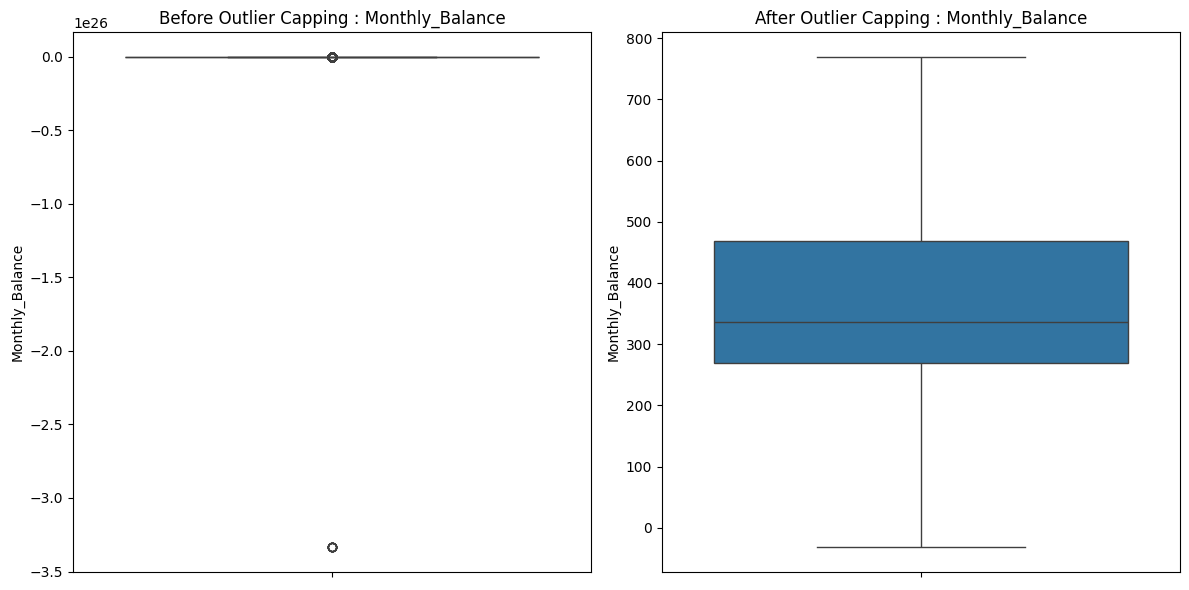

In [41]:
# running the function to compare the numerical columns before and after outlier capping
outlier_capping_comparison(data = df, data_processed = df_clean, outlier_indices = outliers)


It’s evident that outlier capping was useful and effective, as several outliers previously had data that are now gone.

### 03.3. Visualization

As the data is free of missing values and outliers and has proper data types, we can perform some advanced EDA by visualizing it.

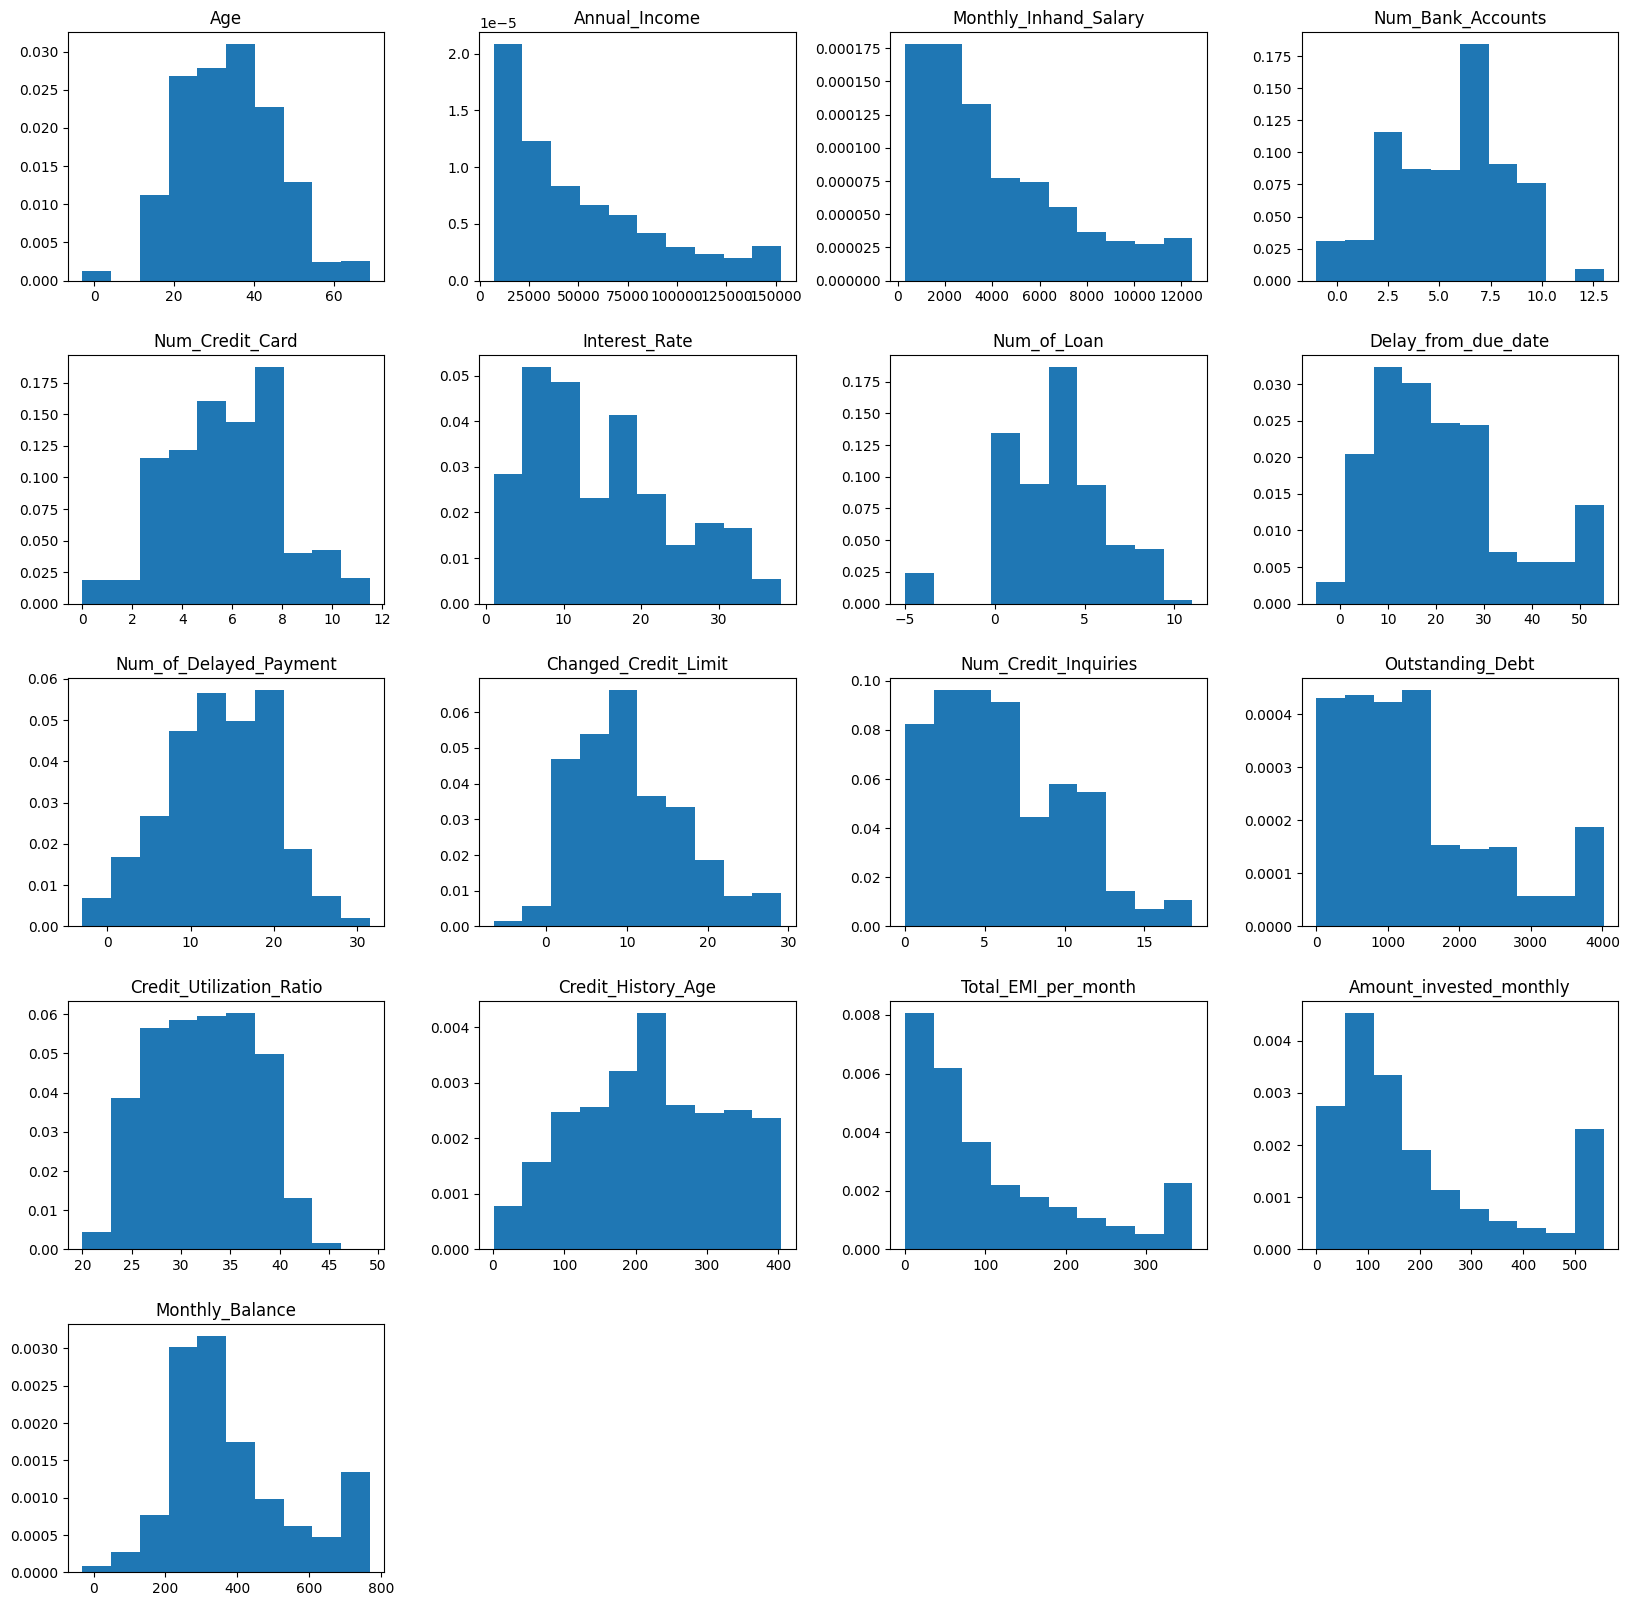

In [42]:
df_clean.hist(figsize=(20, 20), grid=False, density=True)
plt.show()

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

we create a correlation matrix to have a brief idea of the level of multicollinearity in the data.

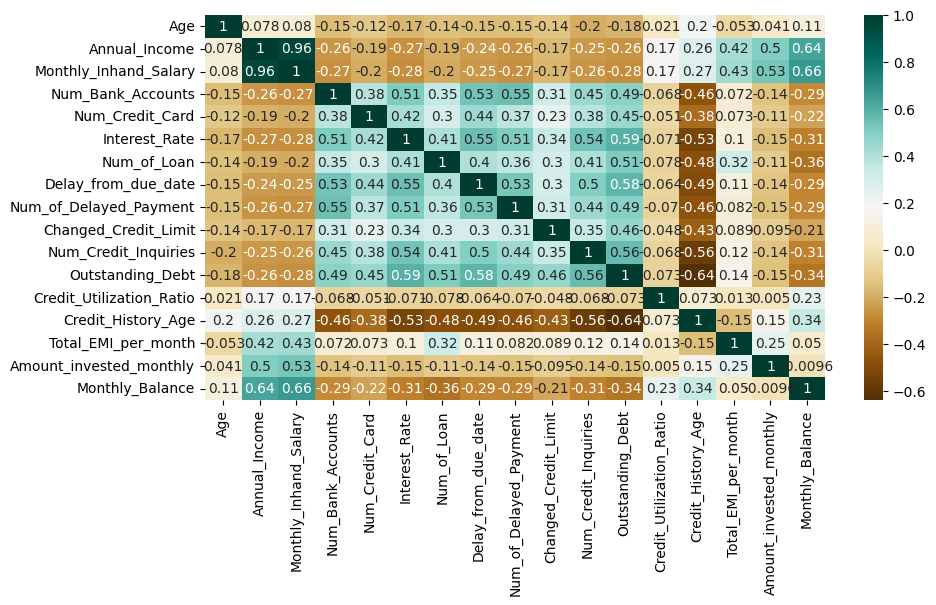

In [44]:
plt.figure(figsize=(10,5))
corr_matrix = df_clean.select_dtypes(float).corr()
sns.heatmap(corr_matrix, cmap="BrBG", annot=True)
plt.show()

 understand the interactions between categorical columns.

Highly Correlated Variables:

Annual_Income and Monthly_Inhand_Salary have a very high correlation (0.958). These two variables are essentially measuring the same thing, so you might consider dropping one of them to avoid multicollinearity.
Credit_History_Age and Outstanding_Debt have a negative correlation (-0.637), indicating that as one increases, the other tends to decrease.
Outstanding_Debt and Num_Credit_Inquiries (0.559) show a strong positive correlation, suggesting that those with more outstanding debt tend to have more credit inquiries.
Potential Redundancies:

Num_of_Delayed_Payment and Delay_from_due_date are also fairly correlated (0.527), which might indicate overlap. You could explore whether both are necessary.
Amount_invested_monthly and Annual_Income (0.505) show some moderate correlation, so they may reflect similar financial behavior, though less strongly than the first pair.
Weak Correlations:

Age shows weak correlations with most other variables, indicating it may not be strongly related to many of the financial attributes.
Credit_Utilization_Ratio has very low correlations with most variables, indicating that it behaves independently in this dataset.

In [45]:
def create_stacked_bar_crosstab(data, cat_col1, cat_col2, rotation_val=0):

    # creating cross tab between two variables
    pd.crosstab(data[cat_col1], data[cat_col2]).plot(kind='bar', stacked=True)

    # adding title
    plt.title(f'{cat_col1} & {cat_col2} Distribution')

    # adding x and y label
    plt.xlabel(f'{cat_col1}')
    plt.ylabel('Number of Observations')

    # option for rotating xticks
    plt.xticks(rotation = rotation_val)

    plt.show()


In [46]:
## Remove Duplicated Values

In [47]:
df_clean = df_clean[df_clean.duplicated(subset=['Customer_ID'], keep=False)]

# Encoding

In [48]:
# converting the Month column by replacing the month name with the month number.
df_clean['Month'] = pd.to_datetime(df_clean.Month, format='%B').dt.month

In [49]:
categorical_cols = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
for column in categorical_cols:
    unique_values_count = len(df_clean[column].unique())
    print(f"Number of unique values in the '{column}' column:", unique_values_count)

Number of unique values in the 'Occupation' column: 15
Number of unique values in the 'Type_of_Loan' column: 6260
Number of unique values in the 'Credit_Mix' column: 3
Number of unique values in the 'Payment_of_Min_Amount' column: 3
Number of unique values in the 'Payment_Behaviour' column: 6


In [50]:
# we perform label encoding ‘Type_of_Loan’ as creating dummy variables will cause dimensionality issues
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_clean['Type_of_Loan'] = label_encoder.fit_transform(df_clean['Type_of_Loan'])

In [51]:
# finding the unique values
print('Unique values in Payment_of_Min_Amount are: ', df_clean['Payment_of_Min_Amount'].unique())

Unique values in Payment_of_Min_Amount are:  ['No' 'NM' 'Yes']


In [52]:
#  it seems ordinal
# setting values
target_mapping = {'No': 1, 'NM': 2, 'Yes': 3}

# mapping values
df_clean['Payment_of_Min_Amount'] = df_clean['Payment_of_Min_Amount'].map(target_mapping)

In [53]:
# now perform one hot encoding on the remaining categorical columns as they all seem of nominal type.
# mentioning the categorical columns where one-hot encoding needs to be performed
columns_to_encode = ['Occupation', 'Credit_Mix', 'Payment_Behaviour']
# creating dummy variables
df_dummy = pd.get_dummies(df_clean[columns_to_encode],dtype=int)
# concatenating the dummy variables with the original dataframe
df_processed = pd.concat([df_clean, df_dummy], axis=1)
# dropping the original categorical columns for which dummy variables were created
df_processed.drop(columns_to_encode, axis=1, inplace=True)

In [54]:
# Step 1: Replace -1 with NaN in Age column
df_processed['Age'] = df_processed['Age'].replace({-1: np.nan})
df_processed.loc[df_processed['Age'] < 0, 'Age'] = np.nan

# Step 2: Calculate maximum age per Customer_ID
max_age_per_customer = df_processed.groupby("Customer_ID")["Age"].max().reset_index()
max_age_per_customer.columns = ["Customer_ID", "Max_Age"]

# Step 3: Merge the maximum age back to the original DataFrame
df_processed = df_processed.merge(max_age_per_customer, on="Customer_ID", how="left")

# Step 4: Impute missing Age values with Max_Age
df_processed["Age"].fillna(df_processed["Max_Age"], inplace=True)

# Step 5: Drop the Max_Age column as it's no longer needed
df_processed = df_processed.drop(columns=["Max_Age"])

# Step 6: Define age bins and labels
age_bins = [14, 18, 25, 35, 45, 55, 68]  # Define the edges of the bins
age_labels = ['14-18', '18-25', '26-35', '36-45', '46-55', '56-68']

# Step 7: Create a new column for binned ages
df_processed['Age_Group'] = pd.cut(df_processed['Age'], bins=age_bins, labels=age_labels, right=False)

# Step 8: Convert the Age_Group categorical variable to numeric codes
# Handle missing Age_Group values before converting to numeric codes
df_processed['Age_Group'] = df_processed['Age_Group'].cat.codes




## Features Engineer
- debt_to_income_ratio
- total_financial_account
- total_saving

In [55]:
df_processed["debt_to_income_ratio"] = df_processed["Outstanding_Debt"] / df_clean["Annual_Income"]

In [56]:
df_processed["total_financial_account"] = df_processed["Num_Bank_Accounts"] + df_clean["Num_Credit_Card"]

In [57]:
df_processed["total_saving"] = df_processed["Monthly_Inhand_Salary"] - df_clean["Total_EMI_per_month"] - df_clean["Monthly_Balance"]

## Feature reduction
Currently, the data contains several independent features, and they may all be useless. Therefore, we will remove unwanted features and select the important ones. We start by dropping columns irrelevant. Binning/Categorization

In [58]:
# df_processed.drop(['ID', 'Customer_ID', 'SSN', 'Name'], axis=1, inplace=True)

- 10 key features you might consider for assessing creditworthiness:

- Debt-to-Income Ratio
- Credit Utilization Ratio
- Payment Delinquency Ratio
- Age of Credit History
- Monthly Savings
- Total Financial Accounts
- Number of Credit Cards
- Outstanding Debt
- Age Bracket
- Num of Loans

# Hypothetical Credit Score Calculation
Credit risk is primarily influenced by financial behaviors, outstanding obligations, and income-related factors. Hence, features directly linked to these are prioritized.
For example, Outstanding Debt, Annual Income, Credit Utilization Ratio, and Debt-to-Income Ratio are widely used in the finance industry to assess an individual's creditworthiness.

* to assign weights to features, you can use several techniques. One common approach is to use domain knowledge to determine which features are most influential based on financial principles. In fintech, features like Debt-to-Income Ratio and Credit Utilization Ratio are often weighted more heavily because they directly impact financial stability.

- Example Weights
- Debt-to-Income Ratio: 30%
- Credit Utilization Ratio: 25%
- Monthly Savings: 20%
- Payment Delinquency Ratio: 15%
- Credit History Age: 10%

* selecting features that are strongly related to financial health and credit behavior, we ensure that the credit score calculation remains both meaningful and focused. Using all 27 fields could introduce irrelevant information, reduce model performance, and make it harder to interpret.
* Using the selected features and their respective weights, I can calculate a credit score for each individual.

In [59]:

# Step 1: Define weights for features
weights = {
    'debt_to_income_ratio': -0.3,
    'Credit_Utilization_Ratio': -0.2,
    'Num_of_Delayed_Payment': -0.2,
    'Credit_History_Age': 0.15,
    'total_saving': 0.1,
    'total_financial_account': 0.05,
    'Num_Credit_Card': 0.05,
    'Outstanding_Debt': -0.1,
    'Age_Group': 0.1,
    'Num_of_Loan': -0.05
}

# Step 2: Normalize features (for better scoring)
def normalize_feature(feature):
    return (feature - feature.min()) / (feature.max() - feature.min())

# Normalizing the relevant columns
for col in weights.keys():
    df_processed[col] = normalize_feature(df_processed[col])

# Step 3: Calculate credit score
df_processed['Credit_Score'] = (
    weights['debt_to_income_ratio'] * df_processed['debt_to_income_ratio'] +
    weights['Credit_Utilization_Ratio'] * df_processed['Credit_Utilization_Ratio'] +
    weights['Num_of_Delayed_Payment'] * df_processed['Num_of_Delayed_Payment'] +
    weights['Credit_History_Age'] * df_processed['Credit_History_Age'] +
    weights['total_saving'] * df_processed['total_saving'] +
    weights['total_financial_account'] * df_processed['total_financial_account'] +
    weights['Num_Credit_Card'] * df_processed['Num_Credit_Card'] +
    weights['Outstanding_Debt'] * df_processed['Outstanding_Debt'] +
    weights['Age_Group'] * df_processed['Age_Group'] +
    weights['Num_of_Loan'] * df_processed['Num_of_Loan']
)

# Step 4: Scale Credit Score to a range (e.g., 300 to 850)
credit_score_min = df_processed['Credit_Score'].min()
credit_score_max = df_processed['Credit_Score'].max()

# Scaling the Credit Score to be between 300 and 850
df_processed['Scaled_Credit_Score'] = 300 + (df_processed['Credit_Score'] - credit_score_min) / (credit_score_max - credit_score_min) * (850 - 300)

# Step 5: Print the relevant columns to view the results
df_processed[['debt_to_income_ratio', 'Credit_Utilization_Ratio', 'Num_of_Delayed_Payment',  'Scaled_Credit_Score']]


,debt_to_income_ratio,Credit_Utilization_Ratio,Num_of_Delayed_Payment,Scaled_Credit_Score
0,0.073992,0.233949,0.289855,669.789163
1,0.073992,0.409596,0.202899,658.710454
2,0.073992,0.295217,0.289855,662.417032
3,0.073992,0.390150,0.202899,662.181899
4,0.073992,0.164502,0.202899,690.368578
...,...,...,...,...
99995,0.022132,0.502818,0.289855,707.996649
99996,0.022132,0.705201,0.289855,682.549775
99997,0.022132,0.728857,0.260870,683.358495
99998,0.022132,0.467658,0.260870,717.619134


**Observation**
The calculated Credit Scores are low (some negative), suggesting the current weights may overly penalize specific features, particularly the debt_to_income_ratio.<br>

**Suggestions to Change Weights**
- Adjust Weights:
        - debt_to_income_ratio: Change from -0.3 to -0.2 to reduce its negative impact.
        - Credit_Utilization_Ratio: Change from -0.2 to -0.15 for a less severe penalty.
        - Outstanding_Debt: Change from -0.1 to -0.05 to slightly lessen the debt impact.
        - Total Savings: Consider increasing from 0.1 to 0.15 to give more weight to savings.
* By adjusting these weights, you can potentially create a more balanced Credit Score that reflects a broader perspective on creditworthiness.

# Analysis and Insights

## Exploratory Data Analysis (EDA) Insights
- **Correlation Analysis**:
  - A high correlation (0.958) between **Annual_Income** and **Monthly_Inhand_Salary** indicates that these features may provide similar information about a user's financial capability.
  - Negative correlation (-0.637) between **Credit_History_Age** and **Outstanding_Debt** suggests that as one increases, the other tends to decrease.
  - The correlation of **Outstanding_Debt** with **Num_Credit_Inquiries** (0.559) indicates that higher outstanding debt is associated with more credit inquiries, which could imply a pattern of seeking additional credit.

- **Potential Redundancies**:
  - Features such as **Num_of_Delayed_Payment** and **Delay_from_due_date** show fair correlation (0.527), which could indicate overlap in information provided.
  - Moderate correlation (0.505) between **Amount_invested_monthly** and **Annual_Income** suggests some financial behavior similarities.

- **Weak Correlations**:
  - **Age** shows weak correlations with most financial attributes, implying it may not significantly influence credit risk.
  - **Credit_Utilization_Ratio** demonstrates low correlations with other variables, suggesting it behaves independently in this dataset.

## Credit Score Calculation Insights
- The calculated **Credit Scores** appear low, indicating that the current weighting scheme might be too punitive on certain financial behaviors, particularly the **debt_to_income_ratio** and **Credit_Utilization_Ratio**.
- The use of normalization before credit score calculation has helped bring all features to a similar scale, enhancing the reliability of the scoring.

## Recency-Based Metrics
- **Recency-Based Credit Score Calculation**:
  - It is feasible to calculate credit scores and aggregated features over different time frames (e.g., last 3 months, last 6 months) to capture trends in user behavior. This approach can provide more relevant insights into a user's current financial health.
  - Implementing a rolling window analysis for features like **Outstanding_Debt**, **Num_Credit_Inquiries**, and payment behaviors can enhance the predictive power of the credit score by accounting for recent changes in financial circumstances.



In [60]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   ID                                                  100000 non-null  object 
 1   Customer_ID                                         100000 non-null  object 
 2   Month                                               100000 non-null  int32  
 3   Name                                                100000 non-null  object 
 4   Age                                                 100000 non-null  float64
 5   SSN                                                 100000 non-null  object 
 6   Annual_Income                                       100000 non-null  float64
 7   Monthly_Inhand_Salary                               100000 non-null  float64
 8   Num_Bank_Accounts                                   100000 non-nu

In [62]:
customer_ids = ["CUS_0xd40", "CUS_0x21b1", "CUS_0x2dbc"]  # Add other IDs as needed

# Filter DataFrame for the specified Customer_IDs
temp = df_processed.loc[df_processed["Customer_ID"].isin(customer_ids)]
# Ensure Customer_ID is of the same type
temp['Customer_ID'] = temp['Customer_ID'].astype(str)

# Function to aggregate features for the last 'n' months
def aggregate_features(df, customer_id, months):
    # Get the maximum month for the customer
    max_month = df[df['Customer_ID'] == customer_id]['Month'].max()
    # Define the threshold month
    threshold_month = max_month - months
    
    # Filter for the last 'n' months
    recent_data = df[(df['Customer_ID'] == customer_id) & (df['Month'] > threshold_month)]
    
    if recent_data.empty:
        return pd.Series({
            'debt_to_income_ratio': None,
            'Credit_Utilization_Ratio': None,
            'Num_of_Delayed_Payment': None,
        })
    
    # Aggregate features
    return pd.Series({
        'debt_to_income_ratio': recent_data['debt_to_income_ratio'].mean(),
        'Credit_Utilization_Ratio': recent_data['Credit_Utilization_Ratio'].mean(),
        'Num_of_Delayed_Payment': recent_data['Num_of_Delayed_Payment'].sum(),
    })

# Create new columns for the last 3 and 6 months
for n_months in [3, 6]:
    aggregated_data = []
    for customer_id in temp['Customer_ID'].unique():
        agg_features = aggregate_features(temp, customer_id, n_months)
        aggregated_data.append(agg_features)
    
    # Create a DataFrame from the aggregated data
    aggregated_df = pd.DataFrame(aggregated_data)
    aggregated_df.columns = [f'{col}_last_{n_months}_months' for col in aggregated_df.columns]
    
    # Add Customer_ID to aggregated_df for merging
    aggregated_df['Customer_ID'] = temp['Customer_ID'].unique()

    # Ensure Customer_ID is of the same type
    aggregated_df['Customer_ID'] = aggregated_df['Customer_ID'].astype(str)
    
    # Merge the aggregated data back to the original DataFrame
    temp = temp.merge(aggregated_df, on='Customer_ID', how='left')

# Now calculate the credit score for the last 3 months and last 6 months
weights = {
    'debt_to_income_ratio_last_3_months': -0.3,
    'Credit_Utilization_Ratio_last_3_months': -0.2,
    'Num_of_Delayed_Payment_last_3_months': -0.2,
}

# Credit score calculation for last 3 months
temp['Credit_Score_last_3_months'] = (
    weights['debt_to_income_ratio_last_3_months'] * temp['debt_to_income_ratio_last_3_months'] +
    weights['Credit_Utilization_Ratio_last_3_months'] * temp['Credit_Utilization_Ratio_last_3_months'] +
    weights['Num_of_Delayed_Payment_last_3_months'] * temp['Num_of_Delayed_Payment_last_3_months']
)

# Define new weights for the last 6 months
weights_6m = {
    'debt_to_income_ratio_last_6_months': -0.3,
    'Credit_Utilization_Ratio_last_6_months': -0.2,
    'Num_of_Delayed_Payment_last_6_months': -0.2,
}

# Credit score calculation for last 6 months
temp['Credit_Score_last_6_months'] = (
    weights_6m['debt_to_income_ratio_last_6_months'] * temp['debt_to_income_ratio_last_6_months'] +
    weights_6m['Credit_Utilization_Ratio_last_6_months'] * temp['Credit_Utilization_Ratio_last_6_months'] +
    weights_6m['Num_of_Delayed_Payment_last_6_months'] * temp['Num_of_Delayed_Payment_last_6_months']
)


# Step 4: Scale Credit Score to a range (e.g., 300 to 850)
credit_score_min_3m = temp['Credit_Score_last_3_months'].min()
credit_score_max_3m = temp['Credit_Score_last_3_months'].max()

# Scaling the Credit Score for the last 3 months to be between 300 and 850
temp['Scaled_Credit_Score_3m'] = 300 + (temp['Credit_Score_last_3_months'] - credit_score_min_3m) / (credit_score_max_3m - credit_score_min_3m) * (850 - 300)

# Step 4: Scale Credit Score for last 6 months to a range (e.g., 300 to 850)
credit_score_min_6m = temp['Credit_Score_last_6_months'].min()
credit_score_max_6m = temp['Credit_Score_last_6_months'].max()

# Scaling the Credit Score for the last 6 months to be between 300 and 850
temp['Scaled_Credit_Score_6m'] = 300 + (temp['Credit_Score_last_6_months'] - credit_score_min_6m) / (credit_score_max_6m - credit_score_min_6m) * (850 - 300)


In [63]:
# Step 1: Define a function to get the required data
def aggregate_scores(group):
    first_3_months = group.head(3)
    last_3_months = group.tail(3)
    
    # Create a new DataFrame for the results
    result = pd.DataFrame({
        'Customer_ID': [group['Customer_ID'].iloc[0], group['Customer_ID'].iloc[0]],
        'Name': [group['Name'].iloc[0], group['Name'].iloc[0]],
        'Month': ['first 3 months', 'last 3 months'],
        'Scaled_Credit_Score_3m': [first_3_months['Scaled_Credit_Score_3m'].mean(), last_3_months['Scaled_Credit_Score_3m'].mean()],
        'Scaled_Credit_Score_6m': [first_3_months['Scaled_Credit_Score_6m'].mean(), last_3_months['Scaled_Credit_Score_6m'].mean()]
    })
    
    return result

# Step 2: Group by Customer_ID and apply the aggregation function
final_result = temp.groupby('Customer_ID').apply(aggregate_scores).reset_index(drop=True)

# Display the final result
final_result

,Customer_ID,Name,Month,Scaled_Credit_Score_3m,Scaled_Credit_Score_6m
0,CUS_0x21b1,Rick Rothackerj,first 3 months,850.000000,850.000000
1,CUS_0x21b1,Rick Rothackerj,last 3 months,850.000000,850.000000
2,CUS_0x2dbc,Langep,first 3 months,300.000000,300.000000
3,CUS_0x2dbc,Langep,last 3 months,300.000000,300.000000
4,CUS_0xd40,Aaron Maashoh,first 3 months,753.945675,516.997695
5,CUS_0xd40,Aaron Maashoh,last 3 months,753.945675,516.997695


# Credit Score Analysis Report

## Overview
This report presents the results of a credit score analysis based on customer financial behaviors over the last 3 and 6 months. The analysis incorporates several features related to customer debt and payment behavior, aggregated to provide insights into their credit health.

## Key Features Created
1. **Scaled Credit Score Last 3 Months**
   - **Definition**: Average credit score over the last 3 months for each customer, scaled to a defined range.
   - **Importance**: Provides a snapshot of recent creditworthiness, reflecting how well customers manage their credit in the short term.

2. **Scaled Credit Score Last 6 Months**
   - **Definition**: Average credit score over the last 6 months for each customer, scaled similarly.
   - **Importance**: Offers a longer-term view of credit behavior, capturing trends and changes over half a year.

## Results Summary
The analysis produced the following scaled credit scores for each customer:

| Customer_ID      | Name              | Month               | Scaled_Credit_Score_3m | Scaled_Credit_Score_6m |
|------------------|-------------------|---------------------|-------------------------|-------------------------|
| CUS_0x21b1       | Rick Rothackerj   | first 3 months      | 850.00                  | 850.00                  |
| CUS_0x21b1       | Rick Rothackerj   | last 3 months       | 850.00                  | 850.00                  |
| CUS_0x2dbc       | Langep            | first 3 months      | 300.00                  | 300.00                  |
| CUS_0x2dbc       | Langep            | last 3 months       | 300.00                  | 300.00                  |
| CUS_0xd40        | Aaron Maashoh     | first 3 months      | 753.95                  | 516.99                  |
| CUS_0xd40        | Aaron Maashoh     | last 3 months       | 753.95                  | 516.99                  |

### Insights:
- **Rick Rothackerj (CUS_0x21b1)** consistently shows excellent credit scores (850) across both time periods, indicating robust financial management and low credit risk.
- **Langep (CUS_0x2dbc)** demonstrates very low credit scores (300) consistently, suggesting potential financial distress or high-risk factors.
- **Aaron Maashoh (CUS_0xd40)** shows a significant drop in credit score from the first (753.95) to the last 3 months (516.99), indicating deteriorating financial health or increased credit risk.

## Recommendations
1. **For Customers with Low Scores (e.g., Langep)**:
   - **Financial Counseling**: Recommend seeking financial counseling to improve their financial situation and credit behavior.
   - **Credit Rehabilitation Programs**: Suggest enrolling in programs focused on rebuilding credit scores through responsible credit use.

2. **For Customers with High Scores (e.g., Rick Rothackerj)**:
   - **Maintain Good Practices**: Encourage them to continue their responsible credit usage to maintain their high scores.
   - **Loyalty Programs**: Consider offering premium credit products or rewards to acknowledge their excellent financial behavior.

3. **For Customers with Fluctuating Scores (e.g., Aaron Maashoh)**:
   - **Monitor Financial Health**: Advise closer monitoring of their credit activity to identify factors contributing to the score drop.
   - **Personalized Financial Guidance**: Provide tailored advice on managing debts and improving credit utilization to stabilize their financial standing.

## Conclusion
The implementation of recent financial behavior aggregation enhances the accuracy of credit score assessments. This approach provides insights into customers' evolving financial health, enabling more tailored recommendations and interventions to support their credit journey.
